In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston
from matplotlib import cm
from sklearn.model_selection import train_test_split
from numpy.linalg import inv
import pandas as pd

# Load the Boston Housing Dataset
features, label = load_boston(return_X_y=True)

In [15]:
X = features[:, [5, 12]]
Y = label

In [16]:
class AdalineRegressor:
    def __init__(self):
        pass
    
    def fit(self, X_train, Y_train):
        self.w = np.matmul(inv(np.matmul(X_train.T, X_train)), np.matmul(X_train.T, Y_train))
        
    def predict(self, X_test):
        Y_predic = np.matmul(X_test, self.w)
        return Y_predic
    
    def evaluation(self, X_test, Y_test):
        Y_predic = np.matmul(X_test, self.w)
        subtract = np.abs(Y_test - Y_predic)
        average = np.mean(subtract)
        return average

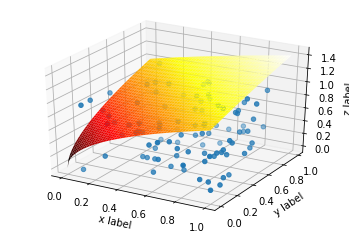

In [ ]:
from mpl_toolkits.mplot3d import *
import matplotlib.pyplot as plt
import numpy as np
from random import random, seed
from matplotlib import cm


fig = plt.figure()
ax = fig.gca(projection='3d')               # to work in 3d

x_surf=np.arange(0, 1, 0.01)                # generate a mesh
y_surf=np.arange(0, 1, 0.01)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
z_surf = np.sqrt(x_surf+y_surf)             # ex. function, which depends on x and y
ax.plot_surface(x_surf, y_surf, z_surf, cmap=cm.hot);    # plot a 3d surface plot

n = 100
seed(0)                                     # seed let us to have a reproducible set of random numbers
x=[random() for i in range(n)]              # generate n random points
y=[random() for i in range(n)]
z=[random() for i in range(n)]
ax.scatter(x, y, z);                        # plot a 3d scatter plot

ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_zlabel('z label')

plt.show()

In [ ]:
z_surf.shape

(100, 100)

In [ ]:
y_surf.shape

(100, 100)

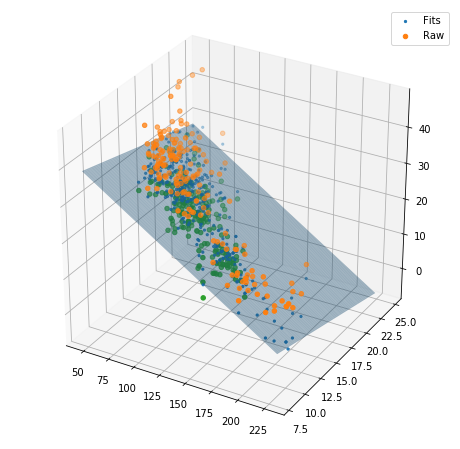

In [ ]:
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

df = sns.load_dataset('mpg')
df.dropna(inplace=True)

model = smf.ols(formula='mpg ~ horsepower + acceleration', data=df)
results = model.fit()

x, y = model.exog_names[1:]

x_range = np.arange(df[x].min(), df[x].max())
y_range = np.arange(df[y].min(), df[y].max())

X, Y = np.meshgrid(x_range, y_range)

exog = pd.DataFrame({x: X.ravel(), y: Y.ravel()})
Z = results.predict(exog).values.reshape(X.shape)

fig = plt.figure(figsize=plt.figaspect(1)*2)
ax = plt.axes(projection='3d')
ax.scatter(df[x].values, df[y].values, results.fittedvalues.values, 
           marker='.', label="Fits")
cond = df[model.endog_names].values > results.fittedvalues.values
ax.scatter(df[x][cond].values, df[y][cond].values, df[model.endog_names]
           [cond].values, label="Raw")
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha = 0.4)
ax.scatter(df[x][cond == False].values, df[y][cond == False].values,
           df[model.endog_names][cond == False].values)
ax.legend()
plt.show()

In [ ]:
X = features[:, [5, 12]]
Y = label
model = AdalineRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=4)

model.fit(X_train, Y_train)
y_predic = model.predict(X)
w = model.w
print(w)

[ 4.80055877 -0.61854444]


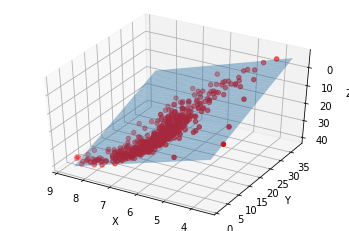

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_range = np.arange(X[:,0].min(), X[:,0].max())
y_range = np.arange(X[:,1].min(), X[:,1].max())

x, y = np.meshgrid(x_range, y_range)

z = x * w[0] + y * w[1]

ax.plot_surface(x, y, z, rstride=1, cstride=1, alpha = 0.4)

ax.scatter(X[:,0], X[:,1], y_predic, c='r', marker='o')

# ax.plot_surface(X[:,0], X[:,1], y_predic, cmap=cm.hot);    # plot a 3d surface plot

# ax.plot_surface(X[:,0], X[:,1], out, rstride=1, cstride=1, color='None', alpha = 0.7)

# Not what I expected :(
# ax.plot_surface(xx, yy, fit.fittedvalues)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(-140, 60)

plt.show()

In [153]:
37*6

222

In [13]:
# ax = fig.gca(projection='3d')               # to work in 3d
ax = plt.axes(projection='3d')


x_range = np.arange(X[:,0].min(), X[:,0].max())
y_range = np.arange(X[:,1].min(), X[:,1].max())

x, y = np.meshgrid(x_range, y_range)

z = x * w[0] + y * w[1]

ax.plot_surface(x, y, z, rstride=1, cstride=1, alpha = 0.4)

ax.scatter(X[:,0], X[:,1], y_predic, c='r', marker='o')

# ax.plot_surface(X[:,0], X[:,1], y_predic, cmap=cm.hot);    # plot a 3d surface plot

# ax.plot_surface(X[:,0], X[:,1], out, rstride=1, cstride=1, color='None', alpha = 0.7)

# Not what I expected :(
# ax.plot_surface(xx, yy, fit.fittedvalues)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(-140, 60)

plt.show()

ValueError: Unknown projection '3d'

<Figure size 432x288 with 0 Axes>